In [1]:
from loading import *

Loaded Cache Files
Time taken to load cache files: 8.32


In [2]:
from halos import Halo

In [3]:
plt.rcParams["text.usetex"] = True
plt.rcParams["figure.figsize"] = (10, 10)

In [4]:
ID = [2, 31, 114, 8504]

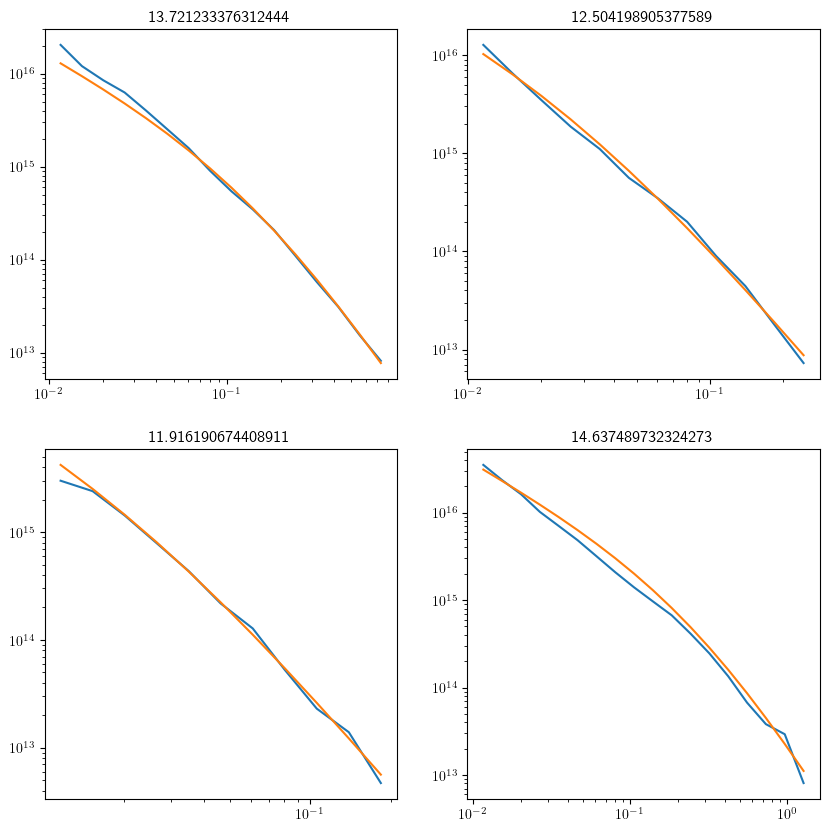

In [5]:
for i, id in enumerate(ID, start=1):
    plt.subplot(2, 2, i)
    test_halo = Halo(id, mvir=mvir, x=x, y=y, z=z, rs=rs, rvir=rvir)
    obs = test_halo.densities(arr_points, 1, 1)
    mask = np.where(RADIUS < test_halo.Rvir)
    obs = obs[mask]
    plt.loglog(RADIUS[mask], obs)
    radii, rhos = test_halo.NFWs(test_halo.Rs)
    plt.loglog(radii, rhos)
    plt.title(np.log10(test_halo.Mvir))
plt.show()


In [6]:
test_halo = Halo(8504, mvir=mvir, x=x, y=y, z=z, rs=rs, rvir=rvir)

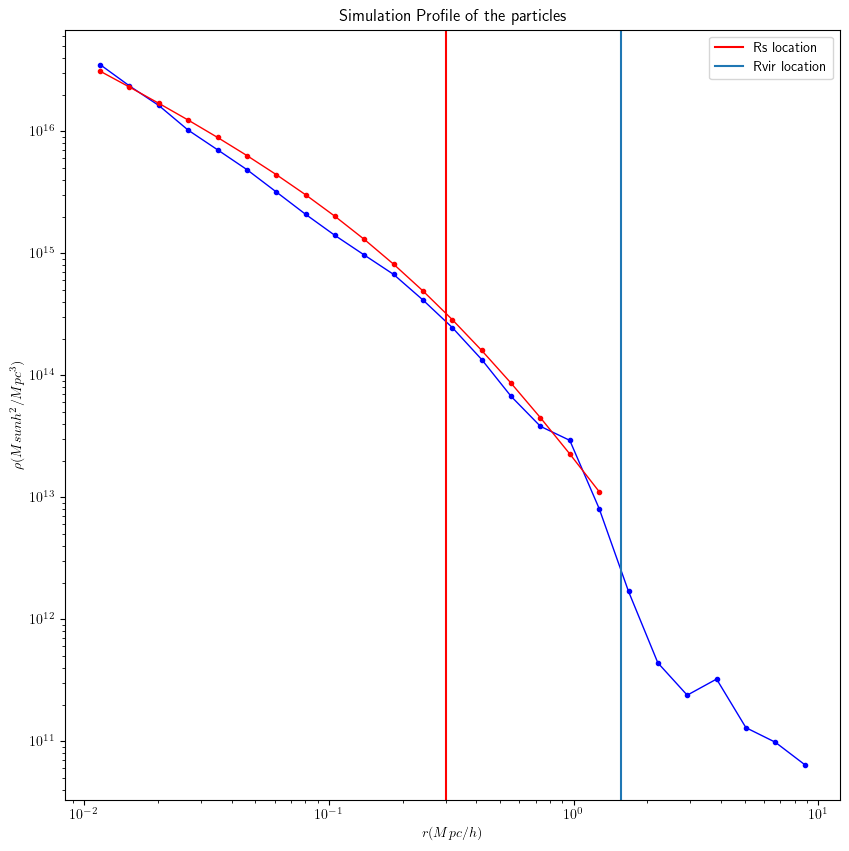

In [7]:
plt.plot(RADIUS, test_halo.densities(arr_points, 1, 1), linewidth=1, marker='.', color='b')
radii, rhos = test_halo.NFWs(test_halo.Rs)
plt.loglog(radii, rhos, linewidth=1, marker='.', color='r')
plt.title('Simulation Profile of the particles')
plt.xlabel('$r (Mpc/h)$')
plt.ylabel(r'$\rho (Msun h^2 / Mpc^3)$')
plt.axvline(x=test_halo.Rs, color='r', label='Rs location')
plt.axvline(x=test_halo.Rvir, label='Rvir location')
plt.xscale('log')
plt.yscale('log')
plt.legend()

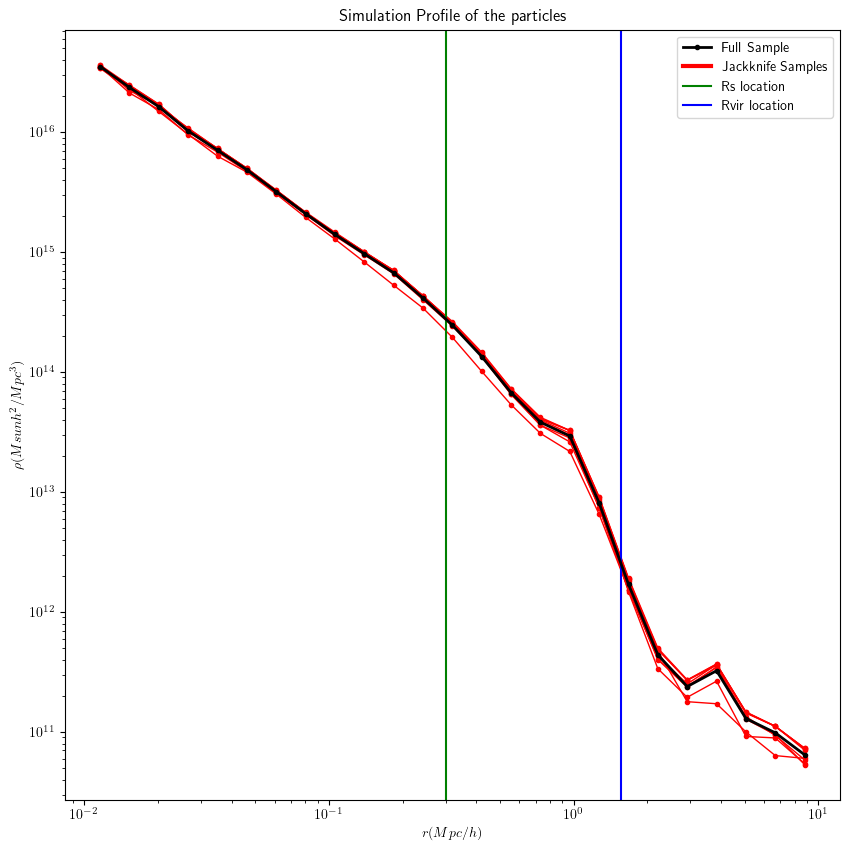

In [8]:
for i in range(1, 10):
    if i == 1:
        den = test_halo.densities(arr_points, 1, 1)
        plt.loglog(RADIUS, den, linewidth=2, marker='.', color='black', zorder=10, label="Full Sample")
    else:
        den = test_halo.densities(arr_points, i, 7./8.)
        plt.loglog(RADIUS, den, linewidth=1, marker='.', color='r')
    # radii, rhos = test_halo.NFWs(test_halo.Rs)
    
plt.plot([], [], color="red", linewidth=3, marker="None", label="Jackknife Samples")
plt.title('Simulation Profile of the particles')
plt.xlabel('$r (Mpc/h)$')
plt.ylabel(r'$\rho (Msun h^2 / Mpc^3)$')
plt.axvline(x=test_halo.Rs, color='g', label='Rs location')
plt.axvline(x=test_halo.Rvir, color='b', label='Rvir location')
plt.legend()
plt.show()

In [10]:
for i in range(1, 10):
    if i == 1:
        # obs = test_halo.densities(arr_points, 1, 1)
        costs = test_halo.minimise_cost(arr_points, 1, 1)
        # plt.loglog(RADIUS, den, linewidth=2, marker='.', color='black', zorder=10, label="Full Sample")
    else:
        # obs = test_halo.densities(arr_points, i, 7./8.)
        costs = test_halo.minimise_cost(arr_points, i, 7/8)
        # plt.loglog(RADIUS, den, linewidth=1, marker='.', color='r')
    
    
#     oRs = test_halo.Rvir / np.exp(costs)
#     orad, orhos = rho_r(oRs, test_halo.Mvir, test_halo.Rvir)

#     if i == 1:
#         plt.loglog(
#             orad, orhos, linewidth=1, label="Full Sample", color="red", zorder=10
#         )
#     else:
#         plt.loglog(orad, orhos, linewidth=0.5, color="black", zorder=1)

#     # plt.xscale("log")
#     # plt.yscale("log")
    
# plt.plot([], [], color="black", linewidth=3, marker="None", label="Jackknife Samples")
# plt.title('Simulation Profile of the particles')
# plt.xlabel('$r (Mpc/h)$')
# plt.ylabel(r'$\rho (Msun h^2 / Mpc^3)$')
# plt.axvline(x=test_halo.Rs, color='g', label='Rs location')
# plt.axvline(x=test_halo.Rvir, color='b', label='Rvir location')
# plt.legend()
# plt.show()